In [1]:
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from loaddatastructs import *
from helperfuncs import *
from plottingfuncs import *

In [3]:
Archive.archive_path = '/data/nriemer/d/sf20/les_output/wrf-partmc'
Archive.gridsize = 100

Archive.addScenario(scenario_name='uniform-basecase', slurm_id=1984671)
Archive.addScenario(scenario_name='fx1fy0', slurm_id=1996526)
Archive.addScenario(scenario_name='road-10x', slurm_id=1996525)
Archive.addScenario(scenario_name='point-source-1x1', slurm_id=1984672)

# Scenarios to evaluate ccn activity in complete absence of ammonia
Archive.addScenario(scenario_name='uniform-basecase-no-nh4', slurm_id=2008005)
Archive.addScenario(scenario_name='point-source-1x1-no-nh4', slurm_id=2008006)

#### SNA Profiles

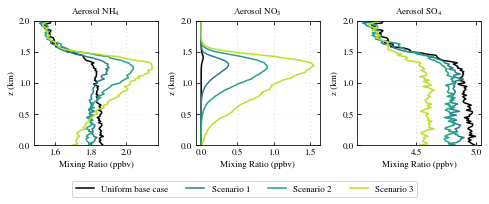

In [4]:
t = 36
plotScenariosVarsVerticalProfile(scenarios=['uniform-basecase', 'fx1fy0', 'road-10x', 'point-source-1x1'
                                            ], variables=['pmc_NH4', 'pmc_NO3', 'pmc_SO4', #'pmc_H2O', 
                                                                                          #'pmc_ARO1'
                                                                                          ], 
                                 time=t, 
                                 general_scenario_label=True,
                                 use_standard_scenario_colors=True,
                                 title='',
                                 fig_xsize=6.9, fig_ysize=2.7,
                                 global_fontsize=9,
                                 grid_linewidth=0.6,
                                 savefig=True,
                                 filename=f'aerosol-SNA-vertical-profiles-time{t}.pdf'
                                 )

#### CCN profiles

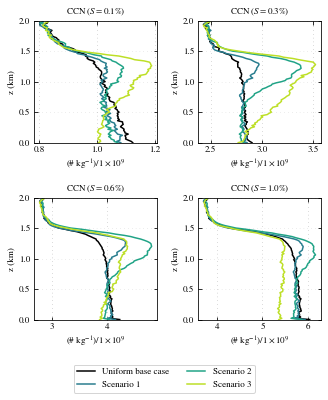

In [6]:
t=36
plotScenariosVarsVerticalProfile(scenarios=['uniform-basecase', 'fx1fy0', 'road-10x', 'point-source-1x1'
                                            ], variables=['ccn_001', 'ccn_003', 'ccn_006', 'ccn_010'
                                                                                          ], 
                                 unit_prefactor=1e-9,
                                 time=36, 
                                 general_scenario_label=True,
                                 use_standard_scenario_colors=True,
                                 title='',
                                 fig_xsize=4.66, fig_ysize=5.2,
                                 global_fontsize=9,
                                 grid_linewidth=0.6,
                                 legend_ncols=2,
                                 savefig=True,
                                 filename=f'aerosol-ccn-vertical-profiles-time{t}.pdf'
                                 )

#### CCN Profiles, no ammonia

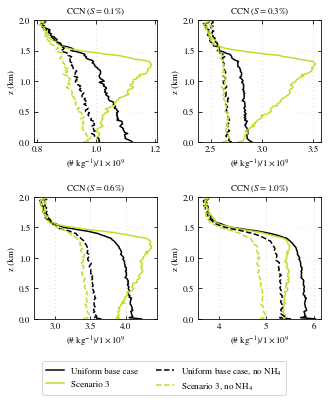

In [5]:
t=36
plotScenariosVarsVerticalProfile(scenarios=['uniform-basecase', 'point-source-1x1', 'uniform-basecase-no-nh4', 'point-source-1x1-no-nh4'
                                            ], variables=['ccn_001', 'ccn_003', 'ccn_006', 'ccn_010'
                                                                                          ], 
                                 time=36, 
                                 general_scenario_label=True,
                                 use_standard_scenario_colors=True,
                                 title='',
                                 unit_prefactor=1e-9,
                                 fig_xsize=4.66, fig_ysize=5.2,
                                 global_fontsize=9,
                                 grid_linewidth=0.6,
                                 legend_ncols=2,
                                 savefig=True,
                                 filename=f'aerosol-ccn-vertical-profiles-no-nh4-cases-time{t}.pdf'
                                 )

In [8]:
def plot_ScenarioDists(dist_type='num', k=25, time=36, **kwargs):

    #global_fontsize = kwargs.get('global_fontsize', 9)
    # Configurable keyword arguments
    xlims = kwargs.get('xlims', (5e-9, 5e-6))
    if dist_type == 'num':
        ylims = kwargs.get('ylims', (1e7, 1e10))
        scaling_factor = 1 # keep as # m^-3
    if dist_type == 'mass':
        ylims = kwargs.get('ylims', (0, 1e-13))
        scaling_factor=1e9 # convert to micrograms per cubic meter
    yscale = kwargs.get('yscale', 'linear')
    savefig = kwargs.get('savefig', True)
    totconctimeidx=kwargs.get('totconctimeidx', Archive.n_times-1)
    lognorm = kwargs.get('lognorm', False)
    dist_cmap_name = kwargs.get('dist_cmap', 'viridis')
    dist_cmap = plt.get_cmap(dist_cmap_name)
    dist_cmap_normrange = kwargs.get('dist_cmap_norm_range', (0.2, 0.9))
    title_size = kwargs.get('title_size', 10)
    label_size = kwargs.get('label_size', 9)
    local_binning = kwargs.get('local_binning', None)
    legend_loc = kwargs.get('legend_loc', 'upper left')
    legend_ncol = kwargs.get('legend_ncol', 2)
    linewidth = kwargs.get('line_width', 1.5)
    write_legend_labels = kwargs.get('write_legend_labels', False)

    tot_conc_label = kwargs.get('field_var', f'TOT_{dist_type.upper()}_CONC')
    tot_conc_title = kwargs.get('field_title', None)

    dist_ij_loc = {'uniform-basecase': [50, 50],
               'fx1fy0': [50, 25], # 25
               'road-10x': [50, 50],
               'point-source-1x1': [50, 50],
    } 

    if kwargs.get('ax', None):
        ax = kwargs['ax']
    else:  
        fig, ax = plt.subplots(1, 1, figsize=(6.5, 4))
    
    # plot initial condition
    scenario_aerodata = Archive.aero_data['uniform-basecase']
    scenario_distdata = Archive.aerodist_data['uniform-basecase']

    x_vals = []
    bin_vals = []
    bin_edges = scenario_distdata['BIN_EDGES'][:].data[0]
    bin_width = bin_edges[1:] - bin_edges[:-1]
    t0 = 0
    i, j = dist_ij_loc['uniform-basecase']
    for bin_idx in range(100):
        bin_idx += 1 # 1 indexing 
        bin_data = scenario_distdata[f'{dist_type}_a{str(bin_idx).zfill(3)}'][t0, k, j, i].data.item()#/1e6
        if local_binning:
            bin_data = scenario_distdata[f'{dist_type}_a{str(bin_idx).zfill(3)}'][t0, k, j-local_binning:j+local_binning, i-local_binning:i+local_binning].data#/1e6
            bin_data = bin_data.mean()
        bin_vals.append(bin_data)
        x_vals.append(bin_idx)

    if write_legend_labels:
        label = 'Initial Condition'
    else:
        label = None
    ax.plot(scenario_distdata['BIN_CENTERS'][:].data[0], scaling_factor*np.array(bin_vals), 
            label=label, c='k', ls='--', lw=linewidth)

        
    colors = Archive.getScenarioColors()
    labels = Archive.getScenarioGeneralLabels()
    for scenario in dist_ij_loc:
        scenario_aerodata = Archive.aero_data[scenario]
        scenario_distdata = Archive.aerodist_data[scenario]
        i, j = dist_ij_loc[scenario]
        c = colors[scenario]
        
        x_vals = []
        bin_vals = []

        bin_edges = scenario_distdata['BIN_EDGES'][:].data[0]
        bin_width = bin_edges[1:] - bin_edges[:-1]

        for bin_idx in range(100):
            bin_idx += 1 # 1 indexing 
            bin_data = scenario_distdata[f'{dist_type}_a{str(bin_idx).zfill(3)}'][time, k, j, i].data.item()#/1e6
            if local_binning:
                bin_data = scenario_distdata[f'{dist_type}_a{str(bin_idx).zfill(3)}'][time, k, j-local_binning:j+local_binning, i-local_binning:i+local_binning].data#/1e6
                bin_data = bin_data.mean()
            bin_vals.append(bin_data)
            x_vals.append(bin_idx)

        if write_legend_labels:
            label = labels[scenario]
        else:
            label = None
        ax.plot(scenario_distdata['BIN_CENTERS'][:].data[0], scaling_factor*np.array(bin_vals), 
                label=label, c=c, lw=linewidth)

    ax.set_xscale('log')

    ax.set_xlim(xlims[0], xlims[1])
    ax.set_ylim(ylims[0], ylims[1])
    ylims = ax.get_ylim()
    if yscale == 'log':
        ax.set_yscale('log')

    #ax.legend(loc=legend_loc, handlelength=1, ncol=legend_ncol, columnspacing=0.8)

    if dist_type == 'num':
        ax.set_ylabel('Number concentration (m$^{-3}$)', fontsize=label_size)
        #ax.set_title(f'Number distribution', fontsize=title_size)
    if dist_type == 'mass':
        ax.set_ylabel('Mass concentration ($\mu$g m$^{-3}$)', fontsize=label_size)
        #ax.set_title(f'Mass distribution', fontsize=title_size)

    ax.set_xlabel('Diameter (m)', fontsize=label_size)

    lw = kwargs.get('grid_linewidth', .7)
    ax.grid(which = "major", linewidth = lw, axis='y', ls="dashed", dashes=(4,4), c='#414141', alpha=.5)
    ax.grid(which = "minor", linewidth = lw, axis='y', ls="dashed", dashes=(6,6), c='white')
    ax.grid(which = "minor", linewidth = lw, axis='x', ls="dotted", dashes=(.5,6), c='#414141')
    ax.grid(which = "major", linewidth = lw, axis='x', ls="dotted", dashes=(.5,6), c='#414141')
    ax.tick_params(axis='both', labelsize=label_size, which='major', direction='in', top=True, right=True, bottom=True, left=True)
    ax.tick_params(axis='both', which='minor',direction='in',top=True, right=True, bottom=True, left=True)

    if kwargs.get('return_ax', False):
        return ax
    
    if savefig:
        plt.savefig(f'combined_{dist_type}conc_i{i}_j{j}_k{k}.pdf', format='pdf', bbox_inches='tight')
    plt.show()

    


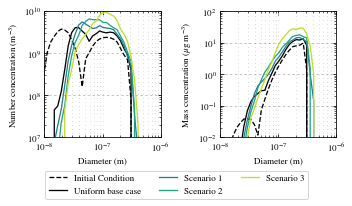

In [15]:
fig, axs = plt.subplots(1,2 , figsize=(5, 2.5))
axs[0] = plot_ScenarioDists(dist_type='num', k=60, times=[36], local_binning=10, ylims=(1e7, 1e10), xlims=(1e-8, 1e-6), yscale='log',
legend_ncol=1, legend_loc='upper right', label_size=9, line_width=1.3, grid_linewidth=.6, ax=axs[0], write_legend_labels=False, 
return_ax=True, savefig=False)

axs[1] = plot_ScenarioDists(dist_type='mass', k=60, times=[36], local_binning=10, ylims=(1e-2, 1e2), xlims=(1e-8, 1e-6), yscale='log',
legend_ncol=1, legend_loc='upper right', label_size=9, line_width=1.3, grid_linewidth=.6, ax=axs[1], return_ax=True, write_legend_labels=True, 
savefig=False)

plt.tight_layout()
fig.legend(fontsize=9, ncol=3, loc='center', bbox_to_anchor=(.5,-.05))

plt.savefig(f'combined_num_mass_conc_i50_j50_k60.pdf', format='pdf', bbox_inches='tight')


/data/nriemer/b/sf20/wrf-partmc-spatial-het/WRFV3/test/em_les/analysis/10km-analysis/../plottingfuncs.py:82: UserWarning: No contour levels were found within the data range.
  CS = ax.contour(zt2, levels=contour_levels, cmap=kwargs.get('contour_cmap', 'gist_gray_r'),


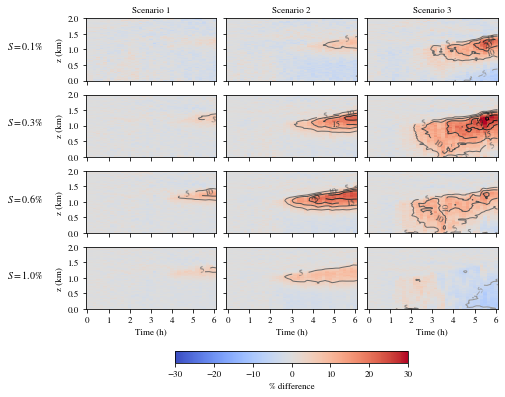

In [5]:
vmin = -30
vmax = 30

plotMultiScenarioCCNPercentDiff(vmin, vmax,  fig_xsize=6.9, fig_ysize=5.42, #plot_significance=True,
                   plot_contours=True, n_contours=13, contour_min=-30, contour_max=30, contour_label_fontsize=9, 
                   smooth_contours=True, contour_smoothing_sigma=.6, contour_linewidth=1,
                   xtick_delta_t=1, xtick_units='h',
                   savefig=True
                   )

/tmp/ipykernel_170379/702789598.py:12: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Blues").copy()
  cmap.set_bad('white')#'#dedede')


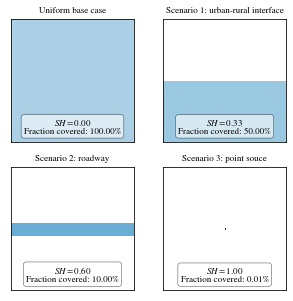

In [15]:
domain_x_cells = 100
domain_y_cells = 100

spatial_het_dir = '/data/keeling/a/sf20/b/wrf-partmc-spatial-het/WRFV3/test/em_les/spatial-het'
sh_dataset = pd.read_csv(f'{spatial_het_dir}/sh_patterns_xres{domain_x_cells}_yres{domain_y_cells}_exact.csv', header=0)

shdir = 'sh-patterns'
griddir = f'xres{domain_x_cells}yres{domain_y_cells}'

fig, axs = plt.subplots(2, 2, figsize=(5, 5))
cmap = plt.cm.get_cmap('Blues')
cmap.set_bad('white')#'#dedede')

analysis_scenarios = ['uniform-basecase', 'fx1fy0', 
                      'road-10x','point-source-1x1'
                     ]

scenario_fmt_names = ['Uniform base case', 'Scenario 1: urban-rural interface', 'Scenario 2: roadway', 'Scenario 3: point souce']

i = 1

for ax, scenario, scenario_fmt in zip(axs.flatten(), analysis_scenarios, scenario_fmt_names):
    nshval = sh_dataset[sh_dataset.scenario == scenario].NSH.values[0]
    ax.set_xticks([])
    ax.set_yticks([])
    filename = f'{scenario}.csv'
    array_path = os.path.join(spatial_het_dir, shdir, griddir, filename)
    scenario_arr = np.genfromtxt(array_path, delimiter=',')
    scaling_factor = sh_dataset[sh_dataset.scenario == scenario]["scaling-factor"].values[0]
    scenario_arr = scaling_factor*scenario_arr
    vmin=.01
    vmax=10000
    ax.pcolormesh(scenario_arr, norm=mplcolors.LogNorm(vmin, vmax), edgecolor='face',
                  #norm=mplcolors.Normalize(vmin,vmax),
                  cmap=cmap)
    meanval = scenario_arr.mean()
    variance = scenario_arr.std()**2

    if scenario == 'uniform-basecase':
        title_name = 'Uniform Base Case'
    else:
        title_name = f'Scenario {i}'
        i += 1
    ax.set_title(scenario_fmt, fontsize=9)
    ax.text(x=.5, y=.07, s=f'$SH={nshval:3.2f}$\nFraction covered: {100/scaling_factor:3.2f}%',
            fontsize=9, linespacing=1,
            horizontalalignment='center', transform=ax.transAxes,
            bbox=dict(facecolor='white', alpha=.6, boxstyle='round', lw=.6))
    #ax.text(x=.5, y=.07, s=f'$SH={nshval:3.2f}$\n$\overline{{f}}(S)={meanval:3.2f}$\n$\sigma^2={variance:3.2f}$',
    #        fontsize=7.5, linespacing=1,
    #        horizontalalignment='center', transform=ax.transAxes,
    #        bbox=dict(facecolor='white', alpha=.6, boxstyle='round', lw=.6))
    ax.set_aspect('equal', adjustable='box')
    
plt.savefig(f'SH-scenarios.pdf', format='pdf', bbox_inches='tight')
